In [1]:
import random

from mkl_random import normal
%matplotlib inline

In [2]:
from config import *
from diffusion.equations import *
os.makedirs(Config.CHECKPOINT_DIR, exist_ok=True)

Figuring out how random seed works. 

Basically, a seed is a number that your computer uses to remember how to generate deterministic random numbers. 

Meaning, if we want a repeatable experiment that people can also run to get the same results. You want your computer to be able to generate the same random numbers for different runs.
 
For example, we want 5 random digits (drawing probability of drawing a card) and run an experiment. A seed ensures that we can the same 5 random digits for a specific seed 

Now combining that with JAX, jax has a function that asks for the seed that you want.
For example, if our seed is 42. Then we specify a key by writing 
```python
random.key(42)
``` 
This generates an array that looks like this $[0,42]$ meaning that 42 is a key to be used to unlock the same random numbers.

So a [1,2] array corresponds to a single key that allow us to access random numbers

If we do want a random number, we simply write: 
```python 
random.uniform(random.key(42))
```
and this gives repeatable answers each time

In [3]:
seed = Config.SEED # 42
np.random.seed(seed)
key = random.PRNGKey(seed)
random.split(key,3)

Array([[3134548294, 3733159049],
       [3746501087,  894150801],
       [ 801545058, 2363201431]], dtype=uint32)

In [5]:
random.fold_in(key, 2)

Array([2465931498,  255383827], dtype=uint32)

In [ ]:
random.split(key)

In [15]:
x, *z = random.split(key,3)
rando

Array([3134548294, 3733159049], dtype=uint32)

In [19]:
random.normal(x,shape=(2,2))

Array([[-0.04324572, -0.24275135],
       [-0.40485173,  0.194955  ]], dtype=float32)

In [20]:
random.normal(x,shape=(2,2))

Array([[-0.04324572, -0.24275135],
       [-0.40485173,  0.194955  ]], dtype=float32)

In [57]:
keys = random.split(key,3)
random.randint(keys[0], minval=0, maxval=2, shape=(512, 2)).shape

(512, 2)

In [14]:
jnp.log2(8)

Array(3., dtype=float32)

In [14]:
random.split(np.array([0,0]).astype(np.uint32), 3)

Array([[2467461003,  428148500],
       [3186719485, 3840466878],
       [2562233961, 1946702221]], dtype=uint32)

In [15]:
key, subkey = random.split()

Array((), dtype=key<fry>) overlaying:
[0 0]

In [40]:
random.uniform(subkey)

Array(0.10536897, dtype=float32)

In [27]:
from datasets.Gaussians import GaussianDataset

In [28]:
import matplotlib.pyplot as plt

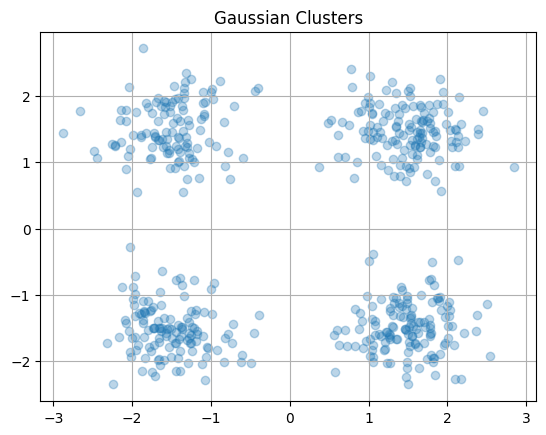

In [29]:
gaussian_dataset = GaussianDataset()
samples = gaussian_dataset.sample_data()
plt.scatter(samples[:,0], samples[:,1], alpha=0.3)
plt.title(f'Gaussian Clusters')
plt.grid()

In [30]:
gaussian_dataset = GaussianDataset(num_clusters=4, datapoints=100, normal=False)
samples = gaussian_dataset.sample_data()
plt.scatter(samples[:,0], samples[:,1], alpha=0.3)
plt.title(f'Gaussian Clusters')
plt.grid()

TypeError: GaussianDataset.__init__() got an unexpected keyword argument 'num_clusters'